<a href="https://colab.research.google.com/github/001ckk/Airline-dataset-to-predict-flight-delays-/blob/main/Team_Naruto_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AIRLINE DATASET TO PREDICT A FLIGHT DELAY.**

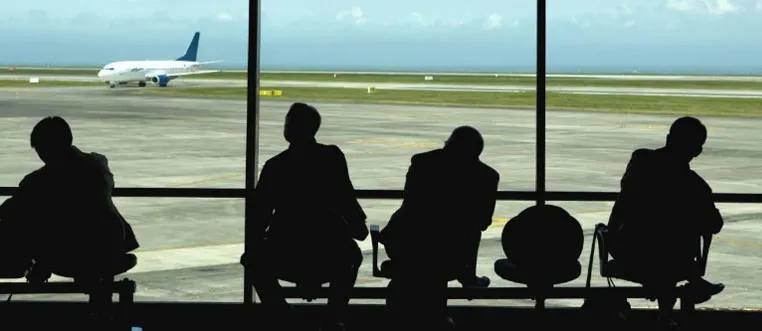
# **Introduction**
With the instantaneous  development of today’s air transport industry, airline travel has in the recent past become a very popular mode of travel. There are so many benefits of traveling by air as compared to other forms of travel. Most important of these benefits being safety and speed. Flying has also become quite affordable in the past decade and it is the most preferred by people traveling both far and short distances. 
Despite these benefits there are still some disadvantages to flying, among them being delays in flights. Delay in flight is an inevitable phenomenon which has significant negative economic effects on airports, passengers and travel agencies. 
A flight delay is when an airline flight takes off and/or lands later than its scheduled time. The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. A cancellation occurs when the airline does not operate the flight at all for a certain reason.

## **Problem Statement**

With this study, we aim at predicting if a flight will be delayed or not depending on the factors that we will analyze. Predicting flight delays will help improve airline operations and attain passenger satisfaction, which will result in a positive economic impact on passengers, airlines, airports and travel agencies. 

# **Objectives.**

We aim to build a model that predicts whether a given flight will be delayed given the information in the scheduled departure.


## **Research Questions**

1. Which airline has the most delays.
2. Which airport there were most delays.
3. What was the average delay time for each airline.
4. Which day of the week had the most delays.
5. Is a relationship/ correlation between the airport and airline which may lead to delays in flights.


### **Metrics of success**
* Read and explore the given dataset.

* Finding and dealing with outliers, anomalies, and missing data within the dataset.

* Performing univariate, bivariate and multivariate analysis.

* Performing Decision tree, KNN, Naive Bayes models and choosing the best model with the highest f1 score with an improvement of both classes.

* Providing recommendation based the analysis.

* Challenge the solution of our best with a different model.

## **Data Understanding**

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib
import warnings 
warnings.filterwarnings('ignore')

Using matplotlib backend: agg


In [ ]:
#Loading the dataset
df = pd.read_csv('Airlines.csv')

In [ ]:
#Shape of the dataset
df.shape
# The data has 9 columns and 539,383 rows 

(276580, 9)

In [ ]:
#First five rows
df.head()
# First four rows 

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3.0,15.0,205.0,1.0
1,2,US,1558,PHX,CLT,3.0,15.0,222.0,1.0
2,3,AA,2400,LAX,DFW,3.0,20.0,165.0,1.0
3,4,AA,2466,SFO,DFW,3.0,20.0,195.0,1.0
4,5,AS,108,ANC,SEA,3.0,30.0,202.0,0.0


In [ ]:
#Last five rows
df.tail()
# Last four rows 

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
276575,276576,XE,2293,IAH,CRP,4.0,1380.0,55.0,1.0
276576,276577,XE,2956,IAH,AUS,4.0,1380.0,46.0,1.0
276577,276578,FL,58,LAX,ATL,4.0,1385.0,250.0,0.0
276578,276579,OO,6439,CWA,EAU,4.0,1385.0,38.0,1.0
276579,276580,UA,126,LAX,ORD,NaN,NaN,NaN,NaN


In [ ]:
# checking the data types
df.dtypes
# The data comprises of integer and objects 

id               int64
Airline         object
Flight           int64
AirportFrom     object
AirportTo       object
DayOfWeek      float64
Time           float64
Length         float64
Delay          float64
dtype: object

In [ ]:
# statistical insight 
df.describe()
# A statistical summary of the columns 

,id,Flight,DayOfWeek,Time,Length,Delay
count,276580.000000,276580.000000,276579.000000,276579.000000,276579.000000,276579.000000
mean,138290.500000,2438.735447,3.879434,802.923855,130.561398,0.384914
std,79841.913064,2076.671279,1.871647,275.859273,69.308621,0.486576
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,69145.750000,729.000000,2.000000,568.000000,80.000000,0.000000
50%,138290.500000,1800.000000,4.000000,798.000000,114.000000,0.000000
75%,207435.250000,3762.000000,5.000000,1034.000000,160.000000,1.000000
max,276580.000000,7813.000000,7.000000,1439.000000,655.000000,1.000000


## **Data Preparation and Cleaning**

**1. Validity check**

In [ ]:
#check how te columns look like
df.columns.values.tolist()

['id',
 'Airline',
 'Flight',
 'AirportFrom',
 'AirportTo',
 'DayOfWeek',
 'Time',
 'Length',
 'Delay']

**2. Accuracy check**

In [ ]:
# more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276580 entries, 0 to 276579
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           276580 non-null  int64  
 1   Airline      276580 non-null  object 
 2   Flight       276580 non-null  int64  
 3   AirportFrom  276580 non-null  object 
 4   AirportTo    276580 non-null  object 
 5   DayOfWeek    276579 non-null  float64
 6   Time         276579 non-null  float64
 7   Length       276579 non-null  float64
 8   Delay        276579 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 19.0+ MB


**3. Completeness check**

In [ ]:
#Check for null values
df.isnull().sum().sum()

4

We have no null values

**4. Consistency check**

In [ ]:
#We check if we have any duplicates
df.duplicated().sum()

0

We have no duplicates

**5. Uniformity check**

In [ ]:
#view our columns
df.columns.values.tolist()

['id',
 'Airline',
 'Flight',
 'AirportFrom',
 'AirportTo',
 'DayOfWeek',
 'Time',
 'Length',
 'Delay']

In [ ]:
#We don't need the Id column so we drop it
df1 = df.drop(['id'], axis=1)
df1.head(2)

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3.0,15.0,205.0,1.0
1,US,1558,PHX,CLT,3.0,15.0,222.0,1.0


In [ ]:
# Checking outliers

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
outliers = df[((df < (q1 - 1.5*iqr))|(df > (q3 + 1.5*iqr)))]
outliers.count()

# There are no outliers in all the other columns other than the length column.
# We will however not drop these outliers since it is possible to have delays that are too long.

id                 0
Airline            0
Flight             0
AirportFrom        0
AirportTo          0
DayOfWeek          0
Time               0
Length         12876
Delay              0
dtype: int64

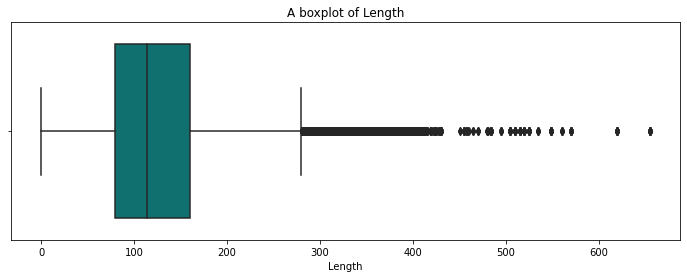

In [ ]:
# Plot showing outliers in delay 
 
fig = plt.figure(figsize=(12,4))
sns.boxplot(x = 'Length', color= 'Teal', data = df)
plt.title('A boxplot of Length')
plt.show()

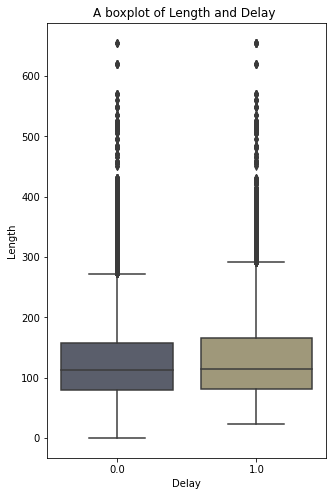

In [ ]:
#Viewing outliers in length for delay
fig = plt.figure(figsize=(5,8))
sns.boxplot(x = 'Delay', y = 'Length', palette = "cividis", data = df1)
plt.title('A boxplot of Length and Delay ')
plt.show()

We have both delay and non delays having outliers due to various causes of delays like; Security reasons, Weather, Technical reasons- airplane parts etc, Flight crew delays. 

In [ ]:
#Checking if there are flights making more trips than others
df1['Flight'].value_counts()

16      230
5       219
8       217
9       210
62      200
       ... 
7219      1
4422      1
3155      1
4424      1
6894      1
Name: Flight, Length: 6402, dtype: int64

Flight 16 makes the most trips while Flights like 6969 which only made one trip

## **EXPLORATORY DATA ANALYSIS**

### **1. Univariate Analysis**

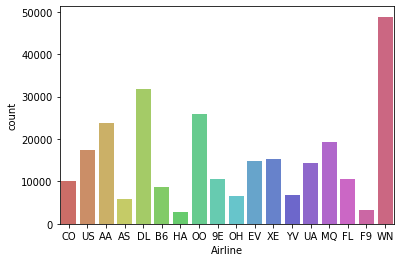

In [ ]:
#Airline counts visual
sns.countplot(x='Airline',data=df1, palette='hls')

WN(Westjet Airline) airline had the most trips made while HA(Hawaiian Airlines) had the least.

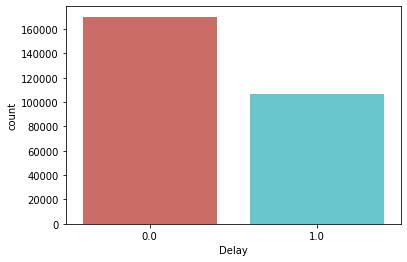

In [ ]:
#Class label counts visual
sns.countplot(x='Delay',data=df1, palette='hls')

This also implies that this will be a binary classification problem where a **“0”** means that the flight arrives on time, and **“1”** that the flight will be delayed.

We can also see more flights were on time compared to those delayed

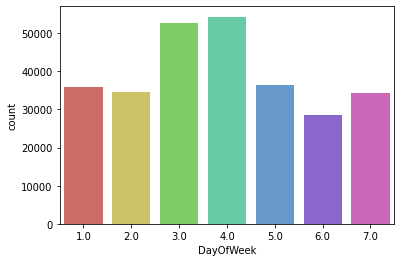

In [ ]:
#Day of week counts visual
sns.countplot(x='DayOfWeek',data=df1, palette='hls')

There were more flights on the fourth day of the week and least on the sixth day of the week

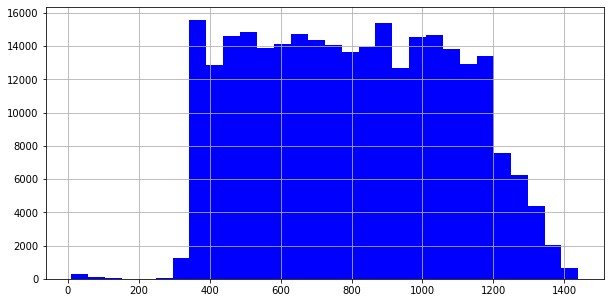

In [ ]:
#Time Distribution plot
df1['Time'].hist(bins = 30, figsize = (10,5), color = 'blue')

The time is set in 24hr format and most trip occured between 0400hr to 1200hrs

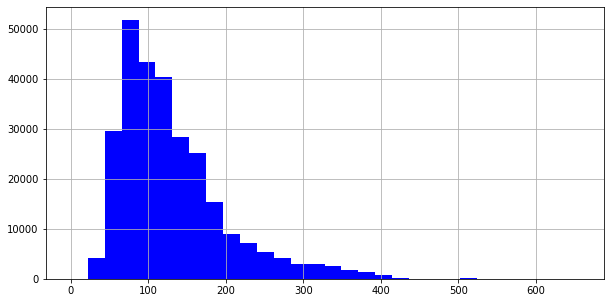

In [ ]:
#Length Distribution plot
df1['Length'].hist(bins = 30, figsize = (10,5), color = 'blue')

Most delay time length was between 50min to 200minutes

### **2. Bivariate Analysis**

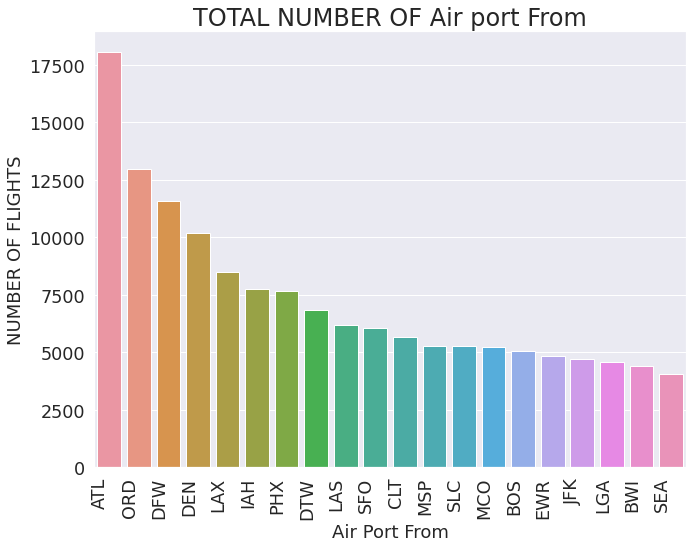

In [ ]:
#Total number of flights from a specific airport
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['AirportFrom'], data=df1, order=df1['AirportFrom'].value_counts().iloc[0:20].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF Air port From', fontsize=24)
plt.xlabel('Air Port From', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

There were more flights from ATL (Hartsfield-Jackson Atlanta International Airport - Georgia
) airport

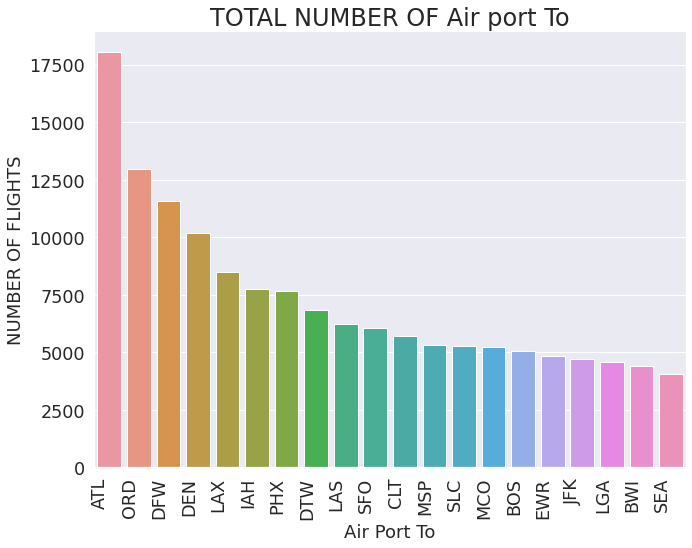

In [ ]:
#Count of air port to by varies flights
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['AirportTo'], data=df1, order=df1['AirportTo'].value_counts().iloc[0:20].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF Air port To', fontsize=24)
plt.xlabel('Air Port To', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

There were more flights to ATL (Hartsfield-Jackson Atlanta International Airport - Georgia ) airport. This expected since the busy the departure so is the arrivals

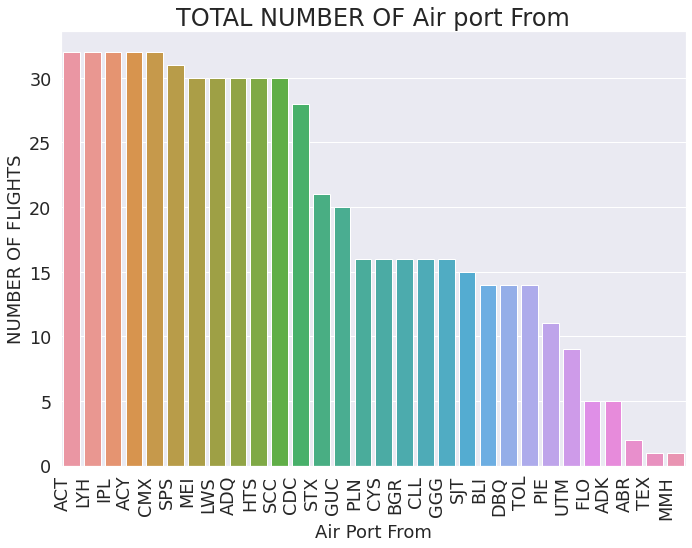

In [ ]:
#Airport From with the least traffic
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['AirportFrom'], data=df1, order=df1['AirportFrom'].value_counts().tail(30).index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF Air port From', fontsize=24)
plt.xlabel('Air Port From', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

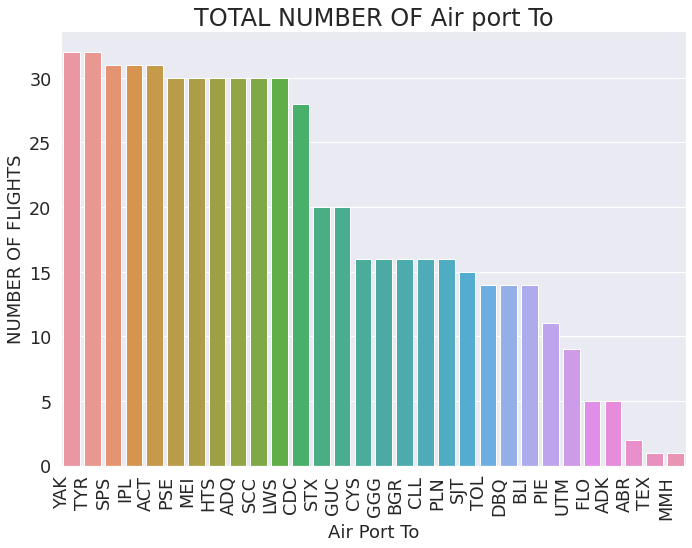

In [ ]:
#Airport To with the least traffic
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['AirportTo'], data=df1, order=df1['AirportTo'].value_counts().tail(30).index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF Air port To', fontsize=24)
plt.xlabel('Air Port To', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

ABR(Aberdeen Regional Airport), ADK(Adak Airport) and GUM(Antonio B. Won Pat International Airport) were the airpot with the least traffic (number of flights in and out). This is expected since there location is most scarcely populated area ie SOuth Dakota, Guam and ALaska

## **Which airport from has the most delays.**

In [ ]:
data=df1.groupby('AirportFrom',as_index=False).mean().sort_values('Length',ascending=False)[['AirportFrom','Length']]
display(data)

,AirportFrom,Length
259,SJU,229.667073
268,STT,218.431373
37,BQN,217.500000
147,JFK,212.836020
224,PSE,208.500000
...,...,...
265,SPS,45.000000
57,CLD,39.686047
225,PSG,35.687500
190,MOD,35.051282


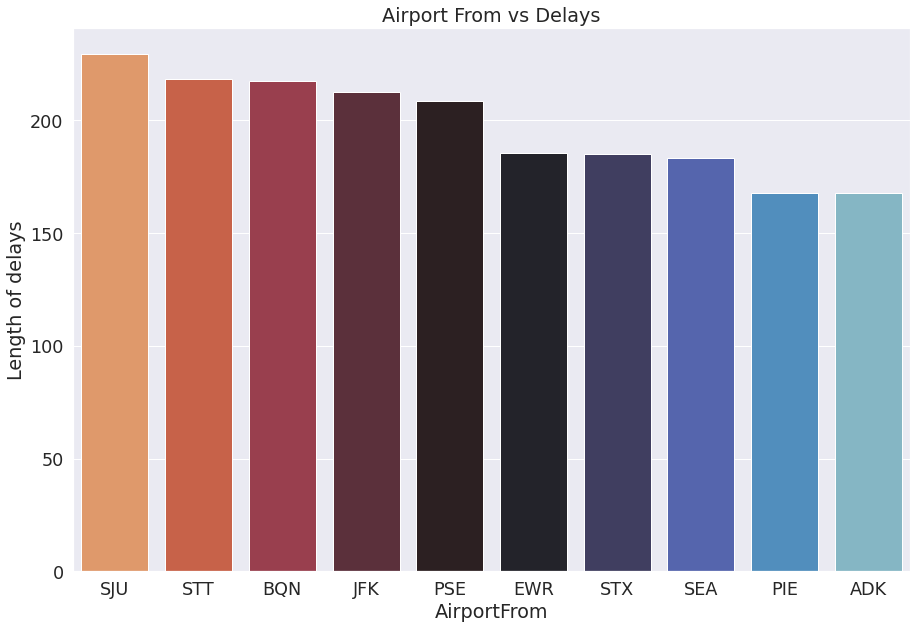

In [ ]:
#Visualizing the above results
#Sorting top 10
top10 = data.head(10)
top10 = top10[:10]
#Visualizing
plt.figure(figsize=(15,10));
sns.barplot(y='Length',x='AirportFrom',data=top10,palette='icefire_r');
plt.xlabel('AirportFrom');
plt.ylabel('Length of delays');
plt.title('Airport From vs Delays');

GUM Airport had the highest delays, being a US territory island in Micronesia it experiences some of the adverse weather such as crosswinds of 30-35 kts or more which are deemed unsafe for take_off or landing.It also geoghraphically lies in the path of typhoons  ( a mature tropical cyclone that develops between 180° and 100°E in the Northern Hemisphere) where it has been hit some of the severe ones like  Typhoon of 1900, Karen (1962), Pamela (1976), Paka (1997), and Pongsona (2002).

It also the home away from home of US military base who occupy 29% of the island


In [ ]:
data1=df1.groupby('AirportTo',as_index=False).mean().sort_values('Length',ascending=False)[['AirportTo','Length']]
display(data1)

,AirportTo,Length
268,STT,206.735294
259,SJU,206.506068
37,BQN,202.885246
251,SEA,200.885714
224,PSE,191.500000
...,...,...
57,CLD,41.651163
288,WRG,40.406250
5,ACT,40.000000
190,MOD,37.641026


Same is observed here since a delay in departure equals a delay in arrival

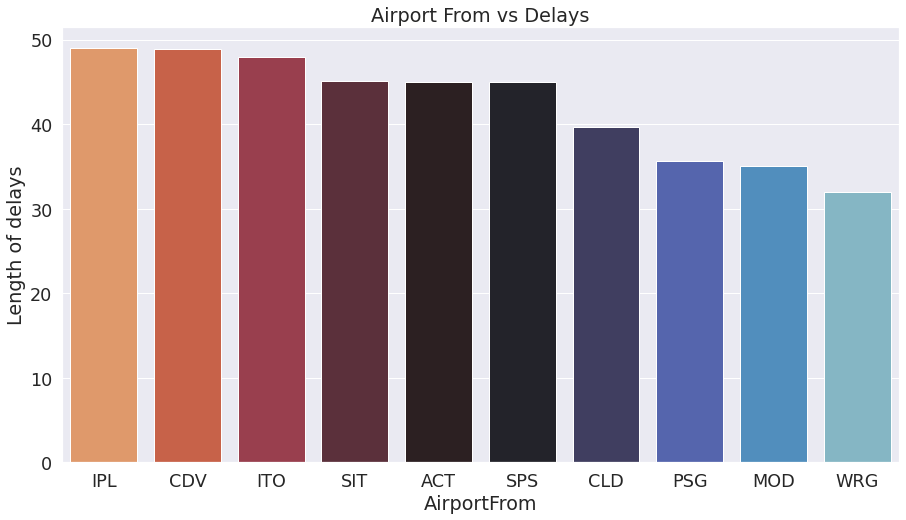

In [ ]:
#Visualizing the Airports with the least delays
#Sorting top 10
lst10 = data.tail(10)

#Visualizing
plt.figure(figsize=(15,8));
sns.barplot(y='Length',x='AirportFrom',data=lst10,palette='icefire_r');
plt.xlabel('AirportFrom');
plt.ylabel('Length of delays');
plt.title('Airport From vs Delays');

From our data set WRG (Wrangell Airport) had the least delay time. This is expected since from previous it was among the airport with the least flights(traffic) and it also had least delay time compared to other with the least flights

## **Which day of the week had the most delays.**

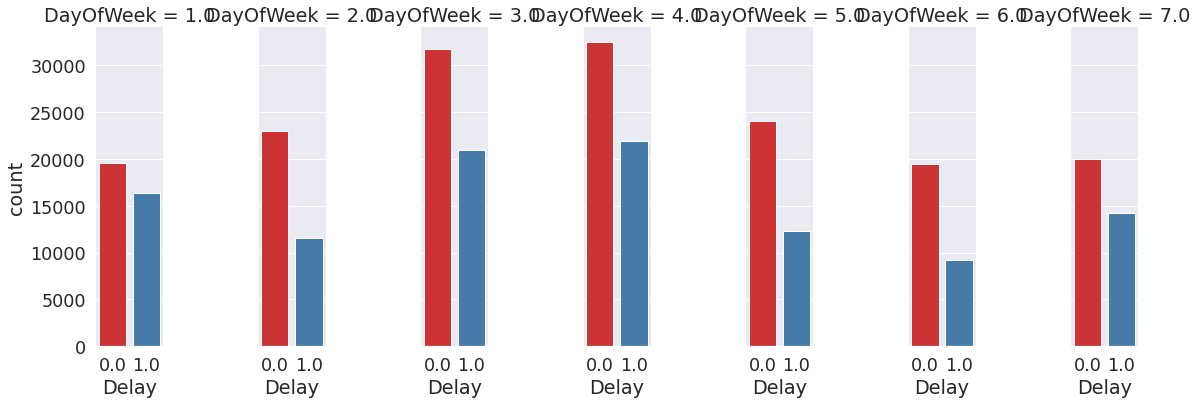

In [ ]:
#Delay vs Airport From
sns.catplot("Delay", col="DayOfWeek", col_wrap=7, data=df1, kind="count", height=6, aspect=.4, palette='Set1')
plt.show()

From a count plot view the day with most delays (1) was Day three and Day four

## **Which day of the week had the longest time of delays.**

In [ ]:
data3=df1.groupby('DayOfWeek',as_index=False).mean().sort_values('Length',ascending=False)[['DayOfWeek','Length']]
display(data3)

,DayOfWeek,Length
5,6.0,133.689982
6,7.0,131.368996
3,4.0,130.661143
4,5.0,130.375865
0,1.0,130.124182
2,3.0,129.599211
1,2.0,129.132874


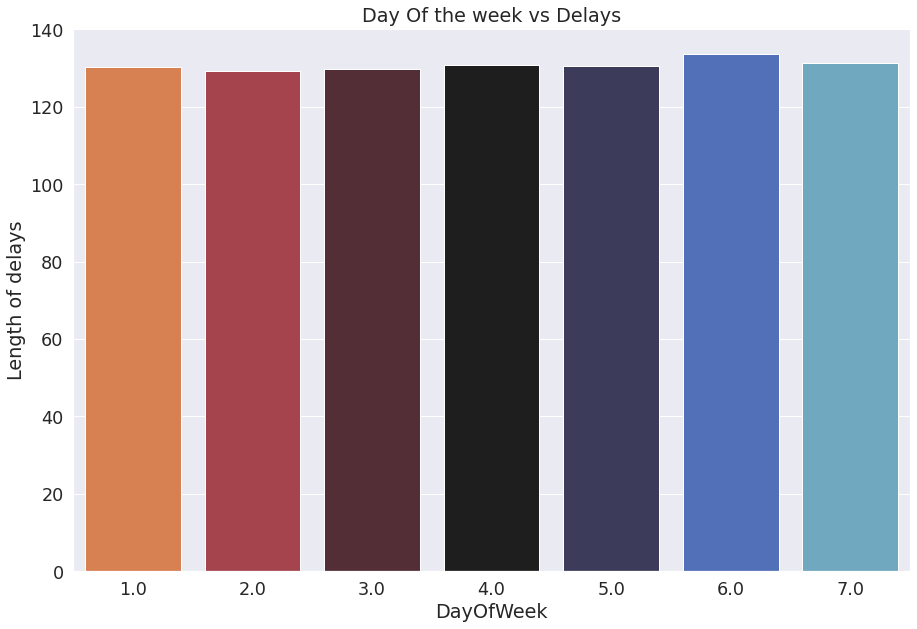

In [ ]:
#Visualizing the above results
#
plt.figure(figsize=(15,10));
sns.barplot(y='Length',x='DayOfWeek', data=data3,palette='icefire_r');
plt.xlabel('DayOfWeek');
plt.ylabel('Length of delays');
plt.title('Day Of the week vs Delays');

From Delay length point of view Day six had the maximum length of delay

# **Which airline had the most delays.**

In [ ]:
#First lets look at the airline with most flights
dx=df1.groupby('Airline',as_index=False).mean().sort_values('Flight',ascending=False)[['Airline','Flight']]
display(dx)

,Airline,Flight
11,OH,6496.837487
12,OO,6102.552979
6,EV,5637.344917
0,9E,3998.314510
17,YV,3687.508010
10,MQ,3665.986068
16,XE,3083.103068
5,DL,1811.065406
15,WN,1393.276638
1,AA,1245.572416


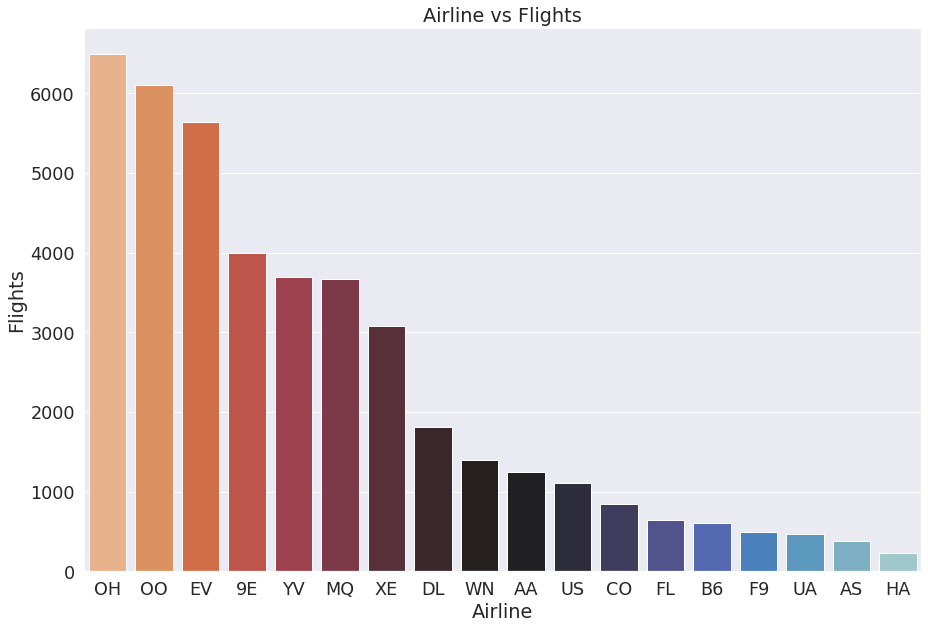

In [ ]:
#Visualizing the above results
plt.figure(figsize=(15,10));
sns.barplot(y='Flight',x='Airline',data=dx,palette='icefire_r');
plt.xlabel('Airline');
plt.ylabel('Flights');
plt.title('Airline vs Flights');

OH (Pacific Southwest) Airlines has the highest number of flights.Some of the contributing factors to highest trips is it was the first large discount airline in the United States. It also 
has its headquartered in Vandalia, Ohio, United States. It not only make local and states trip it also operates internationally.

In [ ]:
#Now the Airlines with most delays
data2=df1.groupby('Airline',as_index=False).mean().sort_values('Length',ascending=False)[['Airline','Length']]
display(data2)

,Airline,Length
13,UA,188.580296
4,CO,188.405700
1,AA,171.775899
2,AS,170.556173
3,B6,168.499825
5,DL,154.479543
7,F9,150.828614
14,US,141.500229
8,FL,130.378175
15,WN,117.053378


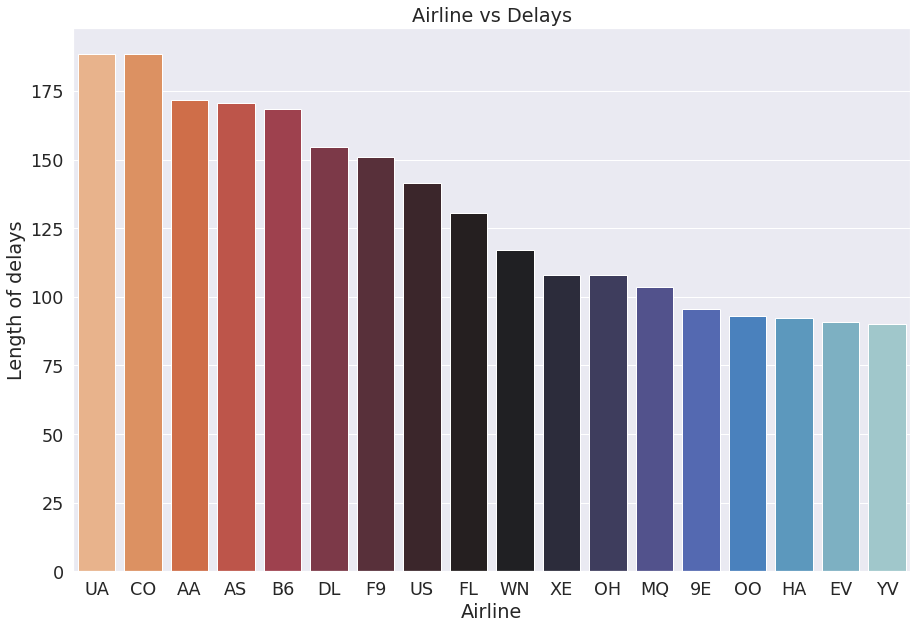

In [ ]:
#Visualizing the above results
plt.figure(figsize=(15,10));
sns.barplot(y='Length',x='Airline',data=data2,palette='icefire_r');
plt.xlabel('Airline');
plt.ylabel('Length of delays');
plt.title('Airline vs Delays');

CO (Continental) airlines comes first with the maximum delay length in time. With its headquater in Houston, Texas; an area afftected by some of adverse weather conditions like tonados are some of its conntributing factors to delays.

### **3. Multivariate Analysis**

In [ ]:
df1.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column .
df1['Airline']= label_encoder.fit_transform(df1['Airline'])
df1['AirportFrom']= label_encoder.fit_transform(df1['AirportFrom'])
df1['AirportTo']= label_encoder.fit_transform(df1['AirportTo'])   
    


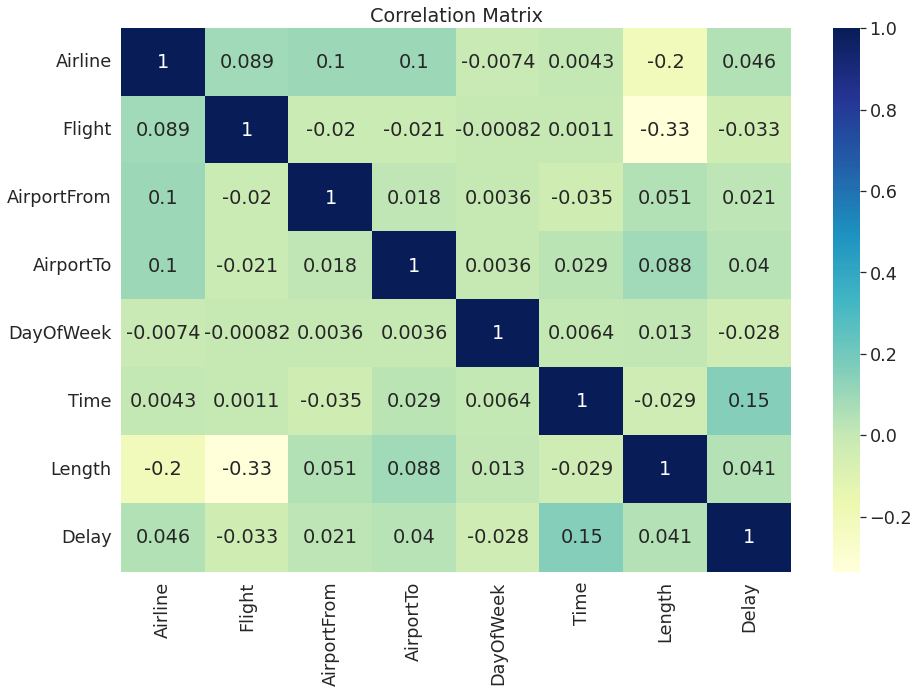

In [ ]:
# plotting the correlation using a heatmap
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(df1.corr( ), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix')
plt.show()

There is no strong correlation between delay and features that might be leading to delay or not

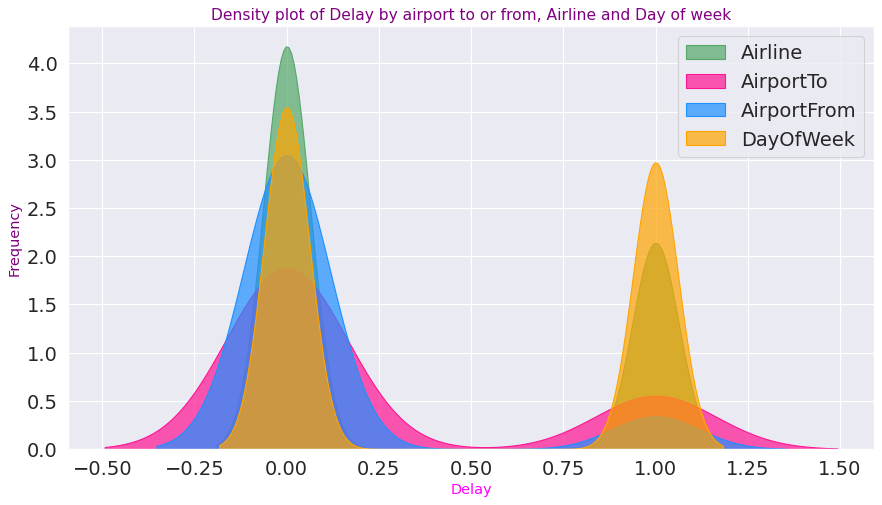

In [ ]:
# Plotting Kernel Density Estimate plots for Delay
# Setting the figuresize of the graph to 13 in length and 7 in height
#
plt.figure(figsize=(13,7), dpi= 80)
sns.kdeplot(df1.loc[df1['Airline'] == True, "Delay"], shade=True, color="g", label="Airline", alpha=.7)
sns.kdeplot(df1.loc[df1['AirportTo'] == True, "Delay"], shade=True, color="deeppink", label="AirportTo", alpha=.7)
sns.kdeplot(df1.loc[df1['AirportFrom'] == True, "Delay"], shade=True, color="dodgerblue", label="AirportFrom", alpha=.7)
sns.kdeplot(df1.loc[df1['DayOfWeek'] == True, "Delay"], shade=True, color="orange", label="DayOfWeek", alpha=.7)
plt.title('Density plot of Delay by airport to or from, Airline and Day of week', fontsize=14, color = 'purple')
plt.xlabel('Delay', fontsize = 13, color = 'magenta')
plt.ylabel('Frequency', color = 'purple', fontsize = 13)
plt.legend()
plt.show()

THe above graph tries to show relatioship between delay and various features. We can see that Airline and Dayof the week are some of the key factor in delay or no delay. This can be intrepretend in than some factor leading to delay such as weather , there could be storm on Tuesday but not on wednesday leading to more  delays on tuesday unlike wednesday. 

On other factors such as Technical reasons, Flight crew delays are directly influnced by the airline.

In [ ]:
#Visual of the diferent determinants of Flights delay
plt.figure(dpi= 80)
sns.pairplot(df1[['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay']], kind="scatter", hue="Delay", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 480x320 with 0 Axes>

## **Modeling**

**Preprocessing**

In [ ]:
#Just an reminder of how our data looks like
df1.head()

### **1. Decision Trees (RandomForest)**

In [ ]:
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
# Splitting the data into training and testing sets 25%
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(n_estimators = 100, random_state=0)
forest11 = forest1.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest11.predict(X_test)

y_pred

In [ ]:
# And now we assess the errors
from sklearn.metrics import classification_report
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_pred))

Our model is giving us an f1 score of 66% for non delayed class and 57% for the delayed class.

In [ ]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
df = pd.DataFrame({'feature': X.columns, 'importance': np.round(forest11.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
df

In [ ]:
# Creating a bar chart of feature importance in descending order
#
df = df[:12].sort_values(by = 'importance', ascending = True)
df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

All our features are important so will move on to parameter tuning

In [ ]:
#Defining our feature again
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
# Splitting the data into training and testing sets 25%
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#We Control the depth and a split of the tree
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
#Evaluating our model
print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
print("Report : ",
    classification_report(y_test, y_pred))

After tuning our parameter our model has improved by giving us an f1 score of 74% for no delayed class and 40% for delayed class. This means our model classifier works best for non delayed class.

### **2. KNN'S**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Reminder of our data
df1.head()

In [ ]:
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)


In [ ]:
#train our model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
# Making predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Without tuning any parameter ou KNN model is giving us an f1 score of 69% for class 0 and 58% for class 1

**Parameter tuning**

In [ ]:
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model = LinearDiscriminantAnalysis()
model.fit(X, y)


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#train our model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
# Making predictions on our test data
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

our measure of success which is f1 score has decreased to 66% and 55% after tuning parameter. coul mean this is not the best model for this dataset

### **3. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

In [ ]:
#Viewing our dataset
df1.head()

In [ ]:
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
# Train model
model = clf.fit(X, y)

# model score
model.score(X, y)

Using bernulli we get a metric score of 55% with no parameters tuned

**Parameter tuning**

In [ ]:
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
# Data Reduction
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

In [ ]:
#Standardizing the data
std = StandardScaler()

x = std.fit_transform(X)

In [ ]:
# Train model
model = clf.fit(x, y)

# model score
model.score(x, y)

After tuning the model does a bit better giving us a metric score of 58%

**Challenging with Gaussian**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
#Spliting to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [ ]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

On using Gaussian our model gives a better score with no parameters tuned of 59%

Parameter tuning in Gaussian

In [ ]:
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
# Data Reduction
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

In [ ]:
#Spliting to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Standardizing
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [ ]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

There is no change in metric score after parameter tuning. 59%

### **6. Neural Networks**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#Dataset overview
df1.head()

In [ ]:
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
 #  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

In [ ]:
# Creating our model
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=10, max_iter=500)

# fitting the data
mlp.fit(X_train,y_train)

In [ ]:
# Predicting
y_pred = mlp.predict(X_test)

# Evaluation
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------')

print(classification_report(y_test,y_pred))

Using the Multilayer perceptron our f1 score is 72% and 47% for our classes repectively. This is just a base line there is no activation or hyperparameter tuning done

**Parameter tuning**

In [ ]:
#Preprocessing
X= df1.drop(['Delay'], axis=1)
y = df1['Delay']

In [ ]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train)
# Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# Creating our model
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', random_state=10, max_iter=500)

# fitting the data
mlp.fit(X_train,y_train)

In [ ]:
# Predicting
y_pred = mlp.predict(X_test)

# Evaluation
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------')

print(classification_report(y_test,y_pred))

After activation and parameter tuning our model was able to get a better f1 score for second class 55% and 71% for first class

#**Random Re-sampling: Oversampling and Undersampling**

In [ ]:
# Import imbalanced-learn Library
# check version number
import imblearn
print(imblearn.__version__)

In [ ]:
# evaluating  neural networks model with random oversampling and undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)

# define pipeline (sampling strategies)
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under), ('m', MLPClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

Running above evaluates the model on the imbalanced dataset with oversampling.

# **Other model comparison with our best model**

In [ ]:
# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
# Selecting the independent variables and the target variable
#
X = df1.drop('Delay', axis = 1)
y = df1['Delay']

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)



In [ ]:
print(confusion_matrix(y, y_pred))
print(classification_report(y,y_pred))

XGBoost Classifier gives a f1 score of 73% and 51% 

In [ ]:
#Introducing early stopping as a form of parameter tuning
X = df1.drop('Delay', axis = 1)
y = df1['Delay']
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Our model hasn't improved it still gives us an f1 score of 73% and 51%

## **Conclusion**

* The best model is Neural network (MLp) follwed by Random forest, however on challenging the given model with XGBoost, XGBoost gives the highest f1 score which is what we are looking for in our metric of success

## **Recommendations**